In [13]:
# calling all the required library for some basic EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats.distributions import chi2
from statsmodels.tsa.stattools import adfuller, kpss
from math import sqrt

sns.set()

In [14]:
raw_data = pd.read_csv('data/Gold_data.csv')
df_working = raw_data.copy()
df_working = df_working[::-1]
df_working.Date = pd.to_datetime(df_working.Date, dayfirst= True)
df_working.set_index('Date', inplace = True)
#df_working = df_working.asfreq('b')
#df_working = df_working.fillna(method = 'ffill')
df_working.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2003-01-31,368.3,368.8,371.5,367.0,6.54K,-0.08%
2003-02-03,370.8,368.0,372.0,368.0,0.82K,0.68%
2003-02-04,379.0,371.4,379.5,371.2,1.36K,2.21%
2003-02-05,376.4,379.0,388.9,374.0,0.83K,-0.69%
2003-02-06,370.1,370.0,377.0,368.4,0.73K,-1.67%


#### Splitting the data!

In [15]:
size = int(len(df_working)*0.8)
df_train = df_working.iloc[:size]
df_train.tail()


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2018-07-04,1258.1,1256.2,1262.4,1255.3,-,-6.27%
2018-07-05,1347.4,1347.4,1347.4,1347.4,0.01K,7.10%
2018-07-06,1344.6,1344.6,1344.6,1344.6,0.01K,-0.21%
2018-07-09,1348.8,1348.8,1348.8,1348.8,0.04K,0.31%
2018-07-10,1344.9,1344.9,1344.9,1344.9,0.07K,-0.29%


In [16]:
df_test = df_working.iloc[size:]
df_test.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2018-07-11,1333.1,1333.1,1333.1,1333.1,0.03K,-0.88%
2018-07-12,1335.2,1335.2,1335.2,1335.2,0.01K,0.16%
2018-07-13,1329.0,1327.0,1327.0,1327.0,0.00K,-0.46%
2018-07-16,1327.5,1327.5,1327.5,1327.5,0.00K,-0.11%
2018-07-17,1314.6,1320.0,1320.0,1320.0,0.03K,-0.97%


#### Loglikely ratio test

In [17]:
def LLR(mod1, mod2,DF):
    L1 = mod1.fit().llf
    L2 = mod2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [18]:
df_train['Percentage_Change_Close_Price'] = df_train.Price.pct_change(1).mul(100)
df_train = df_train.iloc[1:] # removing the first row of the df_train dataframe as when we calculate Close_Price_% , we will get null values in the first row.

C:\Users\Asus\AppData\Local\Temp\ipykernel_18616\3036573149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Percentage_Change_Close_Price'] = df_train.Price.pct_change(1).mul(100)


#### ARIMA BaseModel with p,q,r = 1,1,1

In [24]:
Model_ARIMA_base = ARIMA(df_train.Percentage_Change_Close_Price, order = (1,1,1))
result_base_ARIMA = Model_ARIMA_base.fit()
result_base_ARIMA.summary()

c:\Users\Asus\anaconda3\envs\deepL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\anaconda3\envs\deepL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\anaconda3\envs\deepL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     Percentage_Change_Close_Price   No. Observations:                 3942
Model:                            ARIMA(1, 1, 1)   Log Likelihood               -7138.340
Date:                           Fri, 22 Jul 2022   AIC                          14282.681
Time:                                   13:33:27   BIC                          14301.518
Sample:                                        0   HQIC                         14289.363
                                          - 3942                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1119      0.009    -12.955      0.000      -0.129      -0.095
ma.L1         -0.9998      0.002   -535.576      0.000      -1.003      -0.996
sigma2         2.1874      0.020    111.376      0.000       2.149       2.226
===================================================================================
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):             26469.02
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               2.55   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Residula of ARIMA(1,1,1)

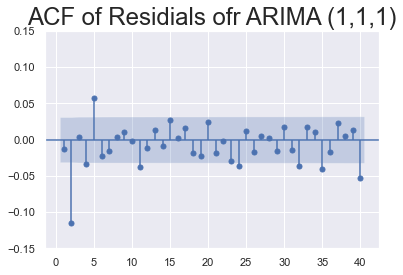

In [30]:
df_train['residual_ARIMA_1_1_1'] = result_base_ARIMA.resid
sgt.plot_acf(df_train.residual_ARIMA_1_1_1, zero = False, lags = 40)
plt.title('ACF of Residials ofr ARIMA (1,1,1)', size = 24)
plt.ylim(-0.15,0.15)
plt.show()

#### Higher-Lag ARIMA models

In [36]:
Model_ARIMA_1 = ARIMA(df_train.Percentage_Change_Close_Price, order = (4,1,4))
result_base_ARIMA_1 = Model_ARIMA_1.fit()
result_base_ARIMA_1.summary()

c:\Users\Asus\anaconda3\envs\deepL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\anaconda3\envs\deepL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\anaconda3\envs\deepL\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\anaconda3\envs\deepL\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     Percentage_Change_Close_Price   No. Observations:                 3942
Model:                            ARIMA(4, 1, 4)   Log Likelihood               -7103.948
Date:                           Fri, 22 Jul 2022   AIC                          14225.895
Time:                                   15:17:45   BIC                          14282.408
Sample:                                        0   HQIC                         14245.943
                                          - 3942                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9016      0.081    -11.140      0.000      -1.060      -0.743
ar.L2         -1.2528      0.063    -20.044      0.000      -1.375      -1.130
ar.L3         -0.6105      0.089     -6.859      0.000      -0.785      -0.436
ar.L4         -0.1670      0.012    -14.363      0.000      -0.190      -0.144
ma.L1         -0.2140      0.083     -2.590      0.010      -0.376      -0.052
ma.L2          0.2750      0.048      5.711      0.000       0.181       0.369
ma.L3         -0.6183      0.055    -11.272      0.000      -0.726      -0.511
ma.L4         -0.4389      0.088     -4.967      0.000      -0.612      -0.266
sigma2         2.1476      0.022     96.569      0.000       2.104       2.191
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):             21822.53
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               2.40   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""